<a href="https://colab.research.google.com/github/Emyfoton/MetodosI_EmilyCastillo_SebastianRodriguez/blob/main/Parcial_3_M%C3%A9todos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procesos de Markov:

Problema 2: Cadena de producción

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

(a)

**Estado del producto en la estación de producción:**

- Avanza a la estación de empaque: Probabilidad = 90%.
- Tiene defecto y permanece en la producción: Probabilidad = 10%.


**Estado del producto en la estación de empaque:**

- Es enviado al mercado: Probabilidad = 95%.
- Permanece en la estación de empaque: Probabilidad = 5%

**Estado del producto en las manos del cliente:**
- Permanece en las manos del cliente= 100%


In [ ]:
# b)
DictS={0:'Producción',1:'Empaquetado',2:'Mercado'}

In [ ]:
# c)
TM = np.array([[0.10,0.90,0.00],\
              [0.00,0.05,0.95],\
              [0.00,0.00,1.00]])

In [ ]:
# d)
n = TM.shape[0]
A = np.vstack((TM.T - np.eye(n), np.ones(n)))
b = np.zeros(n + 1)
b[-1] = 1

pi = np.linalg.lstsq(A, b, rcond=None)[0]
pi

array([ 1.59731365e-16, -1.11022302e-16,  1.00000000e+00])

In [ ]:
# Pi = [0, 0, 1].  La interpretación es que el producto tiende a estar en la manos del cliente el 100 % del tiempo

In [ ]:
# e) P(S1 ∩ S2)
Py = pi[0]*pi[1]
Py

-1.7733743924663986e-32

In [ ]:
# f) P(S1 U S2)
Po = pi[0] + pi[1]
Po

4.8709062599485396e-17

In [ ]:
# g) P(S1^c)
Pv = 1 - (pi[0] + pi[1])
Pv

1.0

Problema 3: Cadena de producción con devolución del producto

(a)

**Estado del producto en la estación de producción:**

- Avanza a la estación de empaque: Probabilidad = 90%
- Tiene defecto y permanece en la producción: Probabilidad = 10%


**Estado del producto en la estación de empaque:**

- Es enviado al mercado: Probabilidad = 95%
- Permanece en la estación de empaque: Probabilidad = 5%


**Estado del producto en las manos del cliente:**

- Permanece en las manos del cliente= 98%
- El producto es devuelto y va directamente a producción: 2%


In [ ]:
# b)
DictS={0:'Producción',1:'Empaquetado',2:'Mercado'}

In [ ]:
#(c)
TMD = np.array([[0.10,0.90,0.00],\
              [0.00,0.05,0.95],\
              [0.02,0.00,0.98]])

In [ ]:
# d)
n = TMD.shape[0]
A = np.vstack((TMD.T - np.eye(n), np.ones(n)))
b = np.zeros(n + 1)
b[-1] = 1

pid = np.linalg.lstsq(A, b, rcond=None)[0]
pid

array([0.02130045, 0.02017937, 0.95852018])

In [ ]:
#Pid. La interpretación es que el producto tiende a estar, aproximadamente, el 2,1 % del tiempo en producción, el 2 % en empaquetado y el 95,9 % en las manos del cliente

In [ ]:
# e) P(S1 ∩ S2)
Pyd = pid[0]*pid[1]
np.round(Pyd,5)

0.00043

In [ ]:
# f) P(S1 U S2)
Pod = pid[0] + pid[1]
np.round(Pod,4)

0.0415

In [ ]:
# g) P(S1^c)
Pvd = 1 - (pid[0] + pid[1])
np.round(Pvd,4)

0.9585

#Hidden Markov Models:

Problema 1: Casino tramposo

In [ ]:
# Hidden Markov: Casino tramposo

# a)
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

Moneda=np.array([0,1])
Prior=np.array([0.2,0.8])
Obs=np.array([1,0,0,0,1,0,1,0])

T = np.array([[0.8,0.2],[0.2,0.8]])

E = np.array([[0.5,0.9],[0.5,0.1]])

DictHidden = {0:'Justa',1:'Sesgada'}

DictObs = {0:'Cara',1:'Sello'}

def GetStates(State,N):
    CStates = list(combinations_with_replacement(State,N))

    Permu = []

    for it in CStates:
      p = list(permutations(it,N))
      for i in p:
        if i not in Permu:
          Permu.append(i)

    CStates = np.array(Permu)

    return CStates

HiddenStates=GetStates(Moneda,8)

# b)
def GetProb(T,E,Obs,State,Prior):

  n = len(Obs)
  p = 1.

  p *= Prior[ State[0] ]

  for i in range(n-1):
    p *= T[ State[i+1], State[i] ]

  for i in range(n):
    p *= E[ Obs[i], State[i] ]

  return p

P = np.zeros(HiddenStates.shape[0])

for i in range(P.shape[0]):
  P[i] = GetProb(T,E,Obs,HiddenStates[i],Prior)

ii = np.where( P == np.max(P) )
print(HiddenStates[ii],P[ii])

[[1 1 1 1 0 0 0 0]] [0.0001911]


In [ ]:
# c)
import pandas as pd
ObsStates = GetStates([0,1],8)
ObsStates

Nobs = ObsStates.shape[0]

PObs = np.zeros(Nobs)

for j in range(Nobs):

  dim = HiddenStates.shape[0]
  P = np.zeros(dim)

  for i in range(dim):
    P[i] = GetProb(T,E,ObsStates[j],HiddenStates[i],Prior)

  PObs[j] = np.sum(P)

PObs

def data_20(ObsStates,PObs):
  t=0
  for i in range(len(PObs)):
    t += PObs[i]
    if t >= 0.2:
      break
  sequences = [''.join(map(str, Secuencia)) for Secuencia in ObsStates[:i+1]]

  df = pd.DataFrame(ObsStates[:i+1])
  df['Probabilidad'] = PObs[:i+1]
  df = df.sort_values(by='Probabilidad',ascending=False)
  df['suma'] = df['Probabilidad'].cumsum()
  current_columns = df.columns.tolist()
  num_existing_columns = len(current_columns)
  new_columns = ['Secuencia','Probabilidad','Suma'] + current_columns[3:]
  df.columns = new_columns
  return df

data_20(ObsStates,PObs)

,Secuencia,Probabilidad,Suma,3,4,5,6,7,Probabilidad,suma
0,0,0,0,0,0,0,0,0,0.136982,0.136982
1,0,0,0,0,0,0,0,1,0.041149,0.178132
2,0,0,0,0,0,0,1,0,0.034737,0.212869


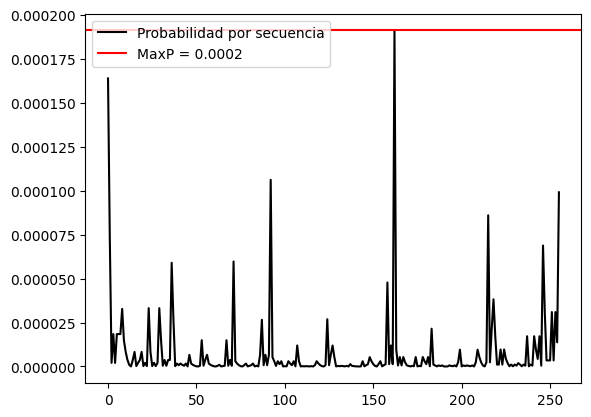

In [ ]:
# d)
plt.plot(P, color='k', label= 'Probabilidad por secuencia')
plt.axhline(np.max(P), color='r', label = 'MaxP = ' + str(np.round(np.max(P),4)))
plt.legend()
plt.show()

In [ ]:
# e)
ObsStates = GetStates([0,1],8)
ObsStates

Nobs = ObsStates.shape[0]

PObs = np.zeros(Nobs)

for j in range(Nobs):

  dim = HiddenStates.shape[0]
  P = np.zeros(dim)

  for i in range(dim):
    P[i] = GetProb(T,E,ObsStates[j],HiddenStates[i],Prior)

  PObs[j] = np.sum(P)

PObs

array([0.13698241, 0.04114921, 0.0347373 , 0.03175272, 0.03026766,
       0.02932288, 0.02830811, 0.02656789, 0.02297818, 0.01870516,
       0.01330002, 0.01467809, 0.01079433, 0.01067359, 0.01276253,
       0.00956961, 0.00877661, 0.00936674, 0.01172117, 0.00883478,
       0.00776184, 0.00767971, 0.00853533, 0.01088136, 0.00811519,
       0.00697382, 0.00661175, 0.00679511, 0.00764233, 0.00970066,
       0.00694603, 0.00590355, 0.00547305, 0.00537647, 0.00555143,
       0.00611094, 0.0074164 , 0.00955193, 0.00649319, 0.00616157,
       0.00733671, 0.00505945, 0.00428819, 0.00497251, 0.00456283,
       0.0048075 , 0.00623446, 0.00432462, 0.00337544, 0.00382959,
       0.00321043, 0.00330316, 0.00416108, 0.00372302, 0.00355961,
       0.00405611, 0.00553322, 0.00381405, 0.00283376, 0.00316972,
       0.00249084, 0.00251514, 0.00309313, 0.00256378, 0.00241017,
       0.0026765 , 0.00353481, 0.00309969, 0.00278698, 0.0028754 ,
       0.00342205, 0.00478004, 0.00319794, 0.00231328, 0.00256

In [ ]:
# f)
np.sum(PObs)

1.0000000000000007

(g)

Sí, el resultado depende de la probabilidad a-priori porque esta representa la distribución inicial de los estados ocultos antes de observar los datos. Si se modifican las probabilidades a-priori, el cálculo de las probabilidades conjuntas y condicionales para las secuencias ocultas también cambiará, afectando las secuencias más probables. Sin embargo, su influencia disminuye a medida que se tienen más observaciones, ya que los datos observados ganan mayor peso en las estimaciones.

(h)

Si quisiera estimar las matrices de transición y emisión, un enfoque metodológico sería emplear redes neuronales, las cuales son adecuadas para modelar secuencias temporales. En este enfoque, los robots podrían ser entrenados para predecir el siguiente estado observable dado el histórico de observaciones, mientras que las probabilidades de transición y emisión se aprenderían como pesos internos de la red.



# Estimación de Parámetros:

Problema 9: Estimación de la temperatura de un gas diatómico

In [ ]:
# Maxwell-Boltzmann distribution

#a)
url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Maxwell.csv"

df = pd.read_csv(url)
df.to_csv('Maxwell.csv', index=False)

Maxwell = pd.read_csv('Maxwell.csv')
Maxwell

,Velocidad
0,547.265773
1,449.920418
2,773.814382
3,823.668389
4,352.873887
...,...
2995,601.470068
2996,508.491149
2997,594.981398
2998,376.388615


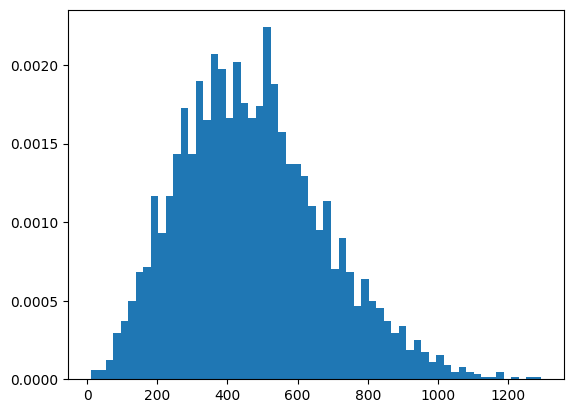

In [ ]:
#b)
histograma = plt.hist(Maxwell, bins=60, density=True)

In [ ]:
# c)
promedio = np.mean(histograma[0])
promedio

0.0007777147550061165

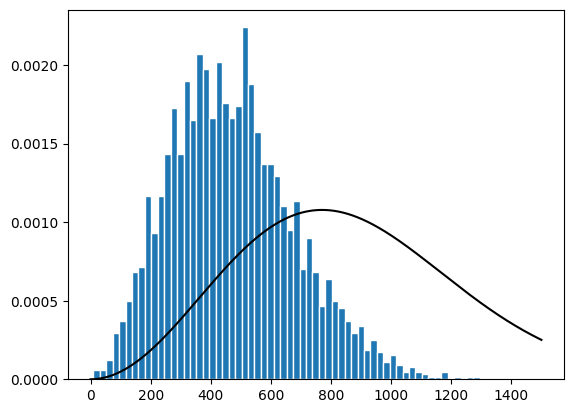

In [ ]:
# d)
V = Maxwell['Velocidad']

def likelihood(T,v):
  epsilon = 1e-10  # Un valor pequeño
  result = ((0.028 / (2 * np.pi * 8.31 * T))**(3/2)) * (4 * np.pi * (v**2) * np.exp(-0.028 * v**2 / (2 * 8.31 * T)))
  return result + epsilon  # Sumar epsilon

plt.hist(V, bins=60, density=True, edgecolor='white')
x=np.linspace(0,1500,1000)
plt.plot(x,likelihood(1000,x), color='k')
plt.show()

In [ ]:
# e)
def JointLikelihood(T,v):
  try:
    result = -np.sum(np.log(likelihood(T, v)))
  except ZeroDivisionError:
    result = float('inf')  # Asignar un valor grande en caso de error
  return result

p0 = 100
import scipy.optimize as spo
result = spo.minimize(JointLikelihood,p0,args=(V))
result.x

array([297.89452501])

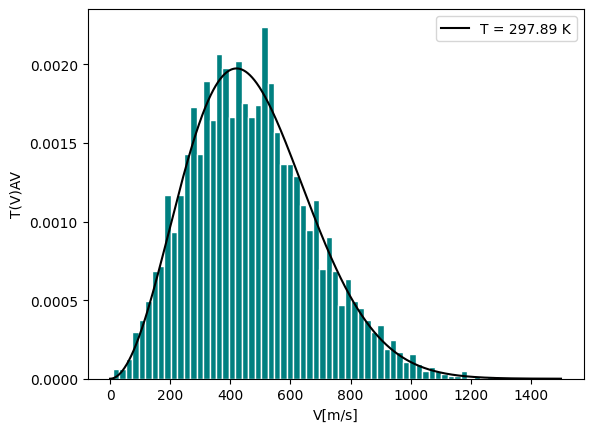

In [ ]:
plt.hist(V, bins=60, density=True, color='teal', edgecolor='white')
x=np.linspace(0,1500,1000)
plt.plot(x,likelihood(result.x,x), color='k', label='T = ' + str(np.round(result.x[0],2)) +" K")
plt.xlabel('V[m/s]')
plt.ylabel('T(V)AV')
plt.legend()
plt.show()

In [ ]:
# f)
vp = np.sqrt(2 * 8.31 * result.x / 0.028)
vp

array([420.5016989])

In [ ]:
# g)
vm = (2/np.sqrt(np.pi)) * vp
vm


array([474.48535676])

g) La velocidad promedio difiere del promedio empírico obtenido
directamente del histograma de datos. Esta discrepancia surge porque Vm se basa
en una aproximación teórica derivada de la distribución de Maxwell-Boltzmann, la
cual considera la forma matemática exacta de cómo las velocidades se distribuyen
en un sistema en equilibrio térmico. Por otro lado, el promedio empírico refleja
directamente los valores medidos en los datos experimentales, que pueden incluir
efectos de ruido o sesgos en la muestra.

In [ ]:
# h)
v2 = np.sqrt(3 * 8.31 * result.x / 0.028)
v2

array([515.00729914])

100%|██████████| 10000/10000 [04:18<00:00, 38.74it/s]


T estimada: 297.84 K (IC 68%: [293.47, 302.37])


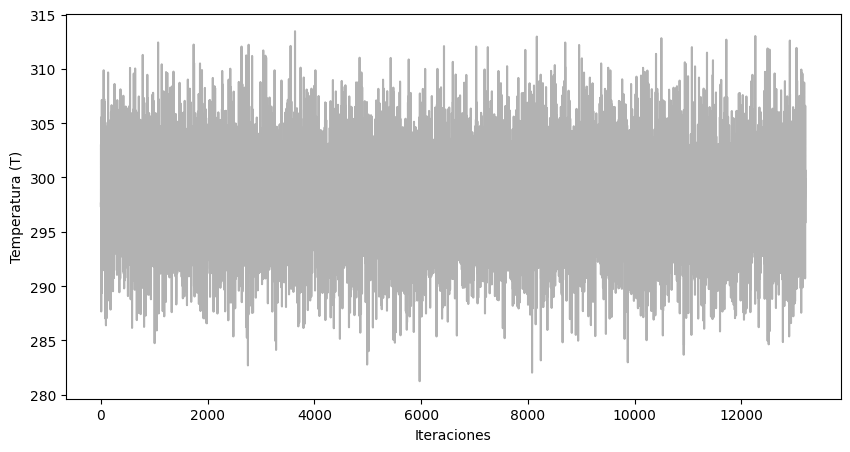

TypeError: 'Axes' object is not subscriptable

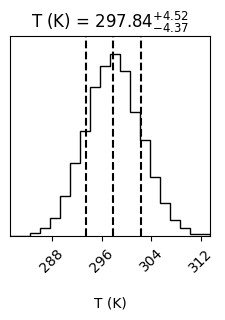

In [ ]:
#(i)
!pip install emcee
!pip install corner

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import emcee
import corner

V = Maxwell['Velocidad']

def LogPrior(p):
    T = p[0]
    if 0 < T < 5000:
        return 0.0
    return -np.inf

def LogLikelihood(p, v):
    T = p[0]
    return -np.sum(np.log(likelihood(T, v)))

def LogPosterior(p, v):
    LogP = LogPrior(p)
    if not np.isfinite(LogP):
        return -np.inf
    return LogP - LogLikelihood(p, v)


n_walkers = 20
n_params = 1
p0 = np.random.uniform(200, 500, size=(n_walkers, n_params))

sampler = emcee.EnsembleSampler(n_walkers, n_params, LogPosterior, args=(V,))
sampler.run_mcmc(p0, 10000, progress=True)

flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
truths = np.percentile(flat_samples, [16, 50, 84], axis=0)


T_est = truths[1][0]
T_lower = truths[0][0]
T_upper = truths[2][0]

print(f"T estimada: {T_est:.2f} K (IC 68%: [{T_lower:.2f}, {T_upper:.2f}])")

fig, axes = plt.subplots(1, figsize=(10, 5))
for i in range(n_params):
    axes.plot(flat_samples[:, i], "k", alpha=0.3)
axes.set_xlabel("Iteraciones")
axes.set_ylabel("Temperatura (T)")
plt.show()

labels = ["T (K)"]
corner.corner(flat_samples, labels=labels, truths=[truths[1]], quantiles=[0.16, 0.5, 0.84], show_titles=True)


In [ ]:
# j)
T_upper = np.percentile(flat_samples, 95, axis=0)[0]
print(f"Temperaturas mayores a {T_upper:.2f} K están excluidas con un 95% de confianza.")


Temperaturas mayores a 305.38 K están excluidas con un 95% de confianza.


Problema 10: Bosón de Higgs

In [2]:
#(a)
import matplotlib.pyplot as plt
import numpy as np
import urllib
import pandas as pd

url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/HiggsFitting.csv'
data = urllib.request.urlopen(url)

Data = pd.read_csv(data)
Data

,Higgs
0,110.788333
1,104.852170
2,104.306032
3,135.544092
4,109.723066
...,...
2245,121.914791
2246,125.824833
2247,123.052246
2248,125.467228


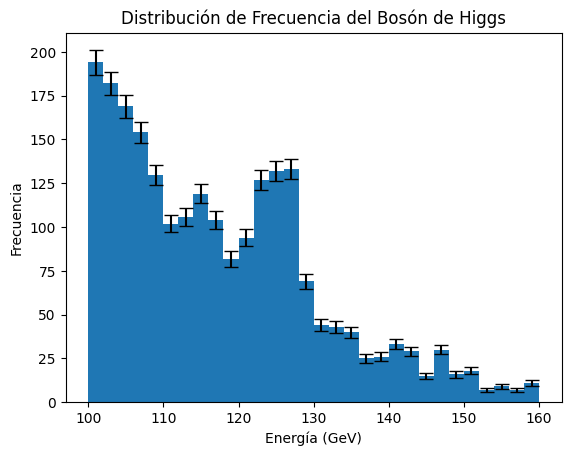

In [3]:
#(b)
import matplotlib.pyplot as plt
import numpy as np

Energia_filtrada = Data[(Data['Higgs'] >= 100) & (Data['Higgs'] <= 160)]['Higgs']

n, bins, patches = plt.hist(Energia_filtrada, bins=30, range=(100, 160))
bin_centers = 0.5 * (bins[:-1] + bins[1:])



plt.errorbar(bin_centers, n, yerr=0.5*np.sqrt(n), fmt='none', ecolor='k', capsize=5)

plt.xlabel('Energía (GeV)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Frecuencia del Bosón de Higgs')
plt.show()

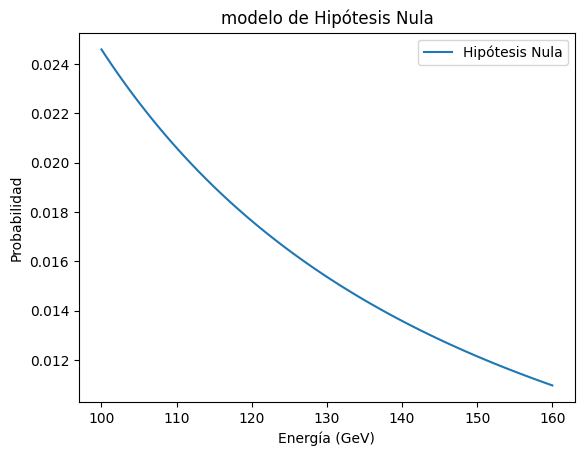

In [4]:
# (c)
def hipotesis_nula(alpha, x):
       return (1/alpha)*np.exp(-(x-100)/alpha)

x = np.linspace(100, 160, 100)
alpha = 10
y = hipotesis_nula(x, alpha)

plt.plot(x, y, label='Hipótesis Nula')
plt.xlabel('Energía (GeV)')
plt.ylabel('Probabilidad')
plt.title('modelo de Hipótesis Nula')
plt.legend()
plt.show()

In [5]:
#(d)
def jointlikelihood(alpha, x):
  try:
    result = -np.sum(np.log(hipotesis_nula(alpha, x)))
  except ZeroDivisionError:
    result = float('inf')  # Asignar un valor grande en caso de error
  return result

In [6]:
#(e)
from scipy.optimize import minimize

alpha_inicial = 0.1
result = minimize(jointlikelihood, alpha_inicial,  args=(Data), bounds= [(0, 50), ])
alpha_optimizado = result.x[0]

print(f"alpha optimizado: {alpha_optimizado}")

alpha optimizado: 17.618897277373158


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


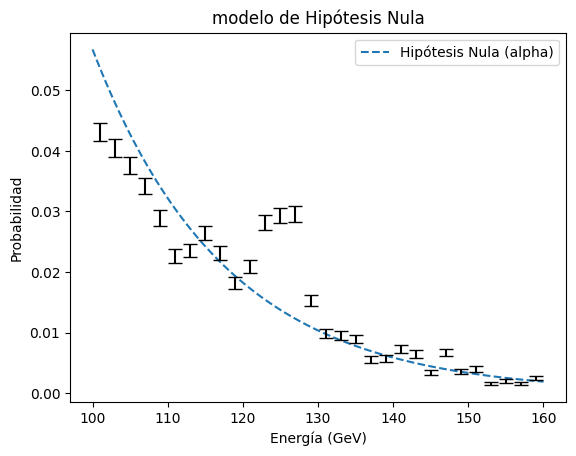

In [7]:
#(f)
x = np.linspace(100, 160, 100)
y = hipotesis_nula(alpha_optimizado,x)


plt.plot(x, y, linestyle='--', label=f'Hipótesis Nula (alpha)')

integral = np.sum(n * np.diff(bins))
yerr_normalizado = 0.5 * np.sqrt(n) / integral
plt.errorbar(bin_centers, n / integral, yerr=yerr_normalizado, fmt='none', ecolor='k', capsize=5)
#plt.errorbar(bin_centers, n, yerr=0.5*np.sqrt(n), fmt='none', ecolor='k', capsize=5)

plt.xlabel('Energía (GeV)')
plt.ylabel('Probabilidad')
plt.title('modelo de Hipótesis Nula')
plt.legend()
plt.show()

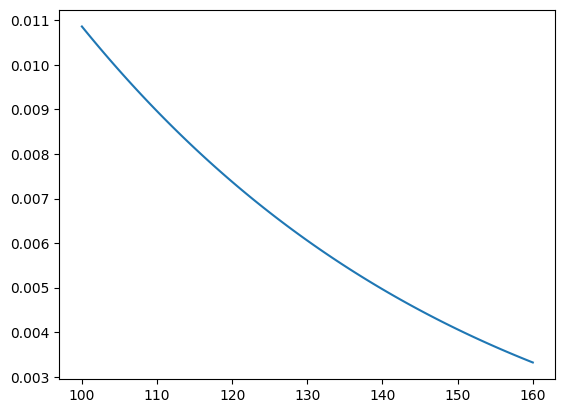

In [139]:
#(g)
def hipotesis_alternativa(p , x):
    A, mu, sigma, alpha = p
    return (A* (np.exp(-(((x - mu)**2) / (2 * sigma**2))))) / (np.sqrt(2 * np.pi * (sigma**2)))  +  ( (1 - A) / alpha) * np.exp(-((x - 100) / alpha))

x = np.linspace(100, 160, 100)
p0 = np.array([0.5, 10, 70, 52])
plt.plot(x, hipotesis_alternativa(p0,x), label=f'Hipótesis Alternativa (A, mu, sigma, alpha)')


In [110]:
#(h)
def jointlikelihood_alternativa(p, x):
  try:
    result = -np.sum(np.log(hipotesis_alternativa(p,x)))
  except ZeroDivisionError:
    result = float('inf')
  return result

In [113]:
# (i)
p0 = np.array([0.15, 125, 2, 16])
bounds = [(0,1), (50, 500), (1, 100), (1, 100)]
result = minimize(jointlikelihood_alternativa, p0, args=(Data), bounds=bounds)

alpha_optimizado2 = result.x[3]
sigma_optimizado = result.x[2]
mu_optimizado = result.x[1]
A_optimizado = result.x[0]

print(f"alpha optimizado2: {alpha_optimizado2}")
print(f"sigma optimizado: {sigma_optimizado}")
print(f"mu optimizado: {mu_optimizado}")
print(f"A optimizado: {A_optimizado}")

alpha optimizado2: 16.363227318299643
sigma optimizado: 2.7753170116330836
mu optimizado: 125.19774888216416
A optimizado: 0.1420877168418221


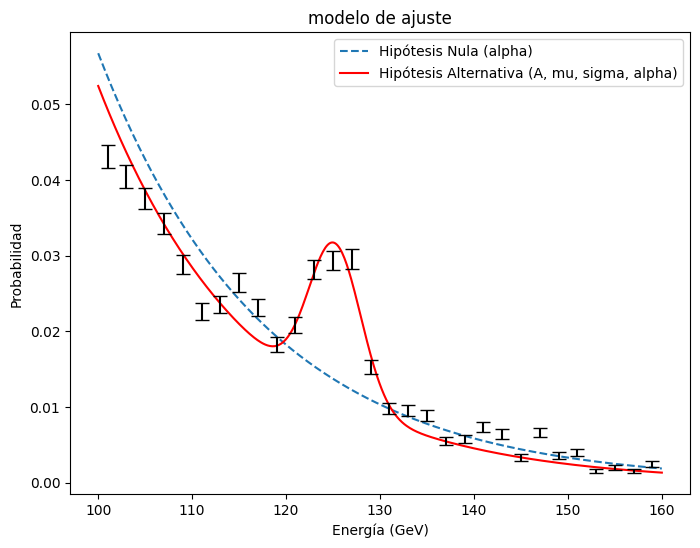

In [116]:
#(j)
p = np.array([A_optimizado, mu_optimizado, sigma_optimizado, alpha_optimizado2])
x = np.linspace(100, 160, 500)
y = hipotesis_nula(alpha_optimizado,x)
y2= hipotesis_alternativa(p,x )

integral = np.sum(n * np.diff(bins))
yerr_normalizado = 0.5 * np.sqrt(n) / integral

plt.figure(figsize=(8, 6))
plt.plot(x, y, linestyle='--', label=f'Hipótesis Nula (alpha)')
plt.plot(x, y2, label=f'Hipótesis Alternativa (A, mu, sigma, alpha)', c= 'red')
plt.errorbar(bin_centers, n / integral, yerr=yerr_normalizado, fmt='none', ecolor='k', capsize=5)

plt.xlabel('Energía (GeV)')
plt.ylabel('Probabilidad')
plt.title('modelo de ajuste')
plt.legend()
plt.show()

In [138]:
#(k)
print(f'El valor de A es: ', A_optimizado)
print(f'El valor de mu es: ', mu_optimizado)
print(f'El valor de sigma es: ', sigma_optimizado)
print(f'El valor de alpha es: ', alpha_optimizado2)

El valor de A es:  0.1420877168418221
El valor de mu es:  125.19774888216416
El valor de sigma es:  2.7753170116330836
El valor de alpha es:  16.363227318299643


In [148]:
# (l)
def des_estandar ( y2, y):
  return np.sqrt(-2*np.log(y2/y) + 0j)

des_estandar(y2, y)
np.mean(des_estandar(y2, y))

(0.502487819585881+0.18090195524791014j)

In [121]:
 # m)

h= 1.015e-23
sigmab = sigma_optimizado*1.602176487e-10
tiempo= h/sigmab
print(f'El tiempo de vida de la partícula es de: ', tiempo)

El tiempo de vida de la partícula es de:  2.2826697870091005e-14


In [122]:
# n)
!pip install emcee
!pip install corner

In [153]:
import emcee
import corner
import numpy as np
import matplotlib.pyplot as plt

def LogPrior(p):
    A, mu, sigma, alpha = p
    if 0.0 < A < 1.0 and 50.0 < mu < 500.0 and 1.0 < sigma < 100.0 and 1.0 < alpha < 100.0:
        return 0.0
    else:
        return -np.inf

def Likelihood(p, x):
    return hipotesis_alternativa(p, x)

def JointLikelihood(p, x):
    try:
        return -np.sum(np.log(Likelihood(p, x)))
    except ValueError:
        return -np.inf

def LogPosterior(p, x):
    LogP = LogPrior(p)
    if not np.isfinite(LogP):
        return -np.inf
    return LogP - JointLikelihood(p, x)

n_walkers, n_params = 10, 4
p0 = np.zeros((n_walkers, n_params))
p0[:, 0] = A_optimizado
p0[:, 1] = mu_optimizado
p0[:, 2] = sigma_optimizado
p0[:, 3] = alpha_optimizado2
p0 += 0.01 * np.random.rand(n_walkers, n_params)

100%|██████████| 5000/5000 [01:24<00:00, 59.23it/s]


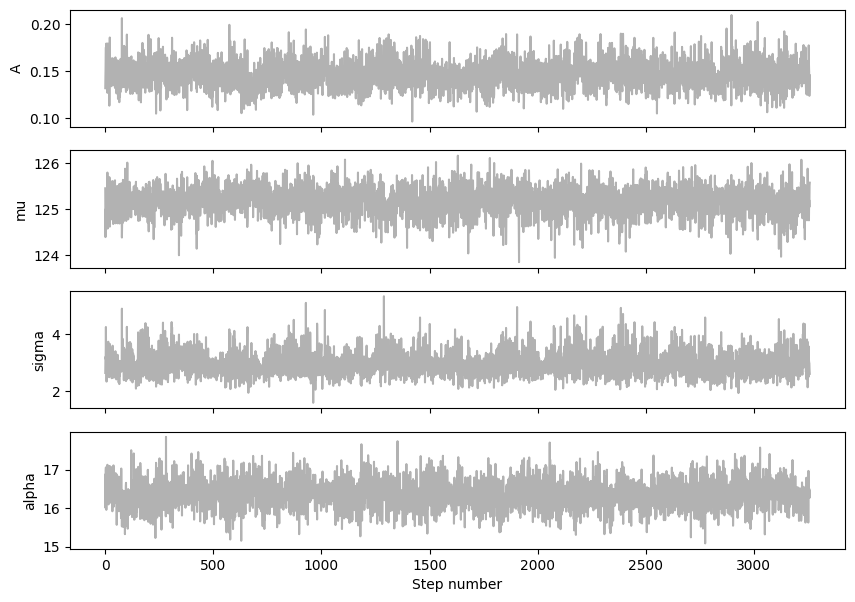

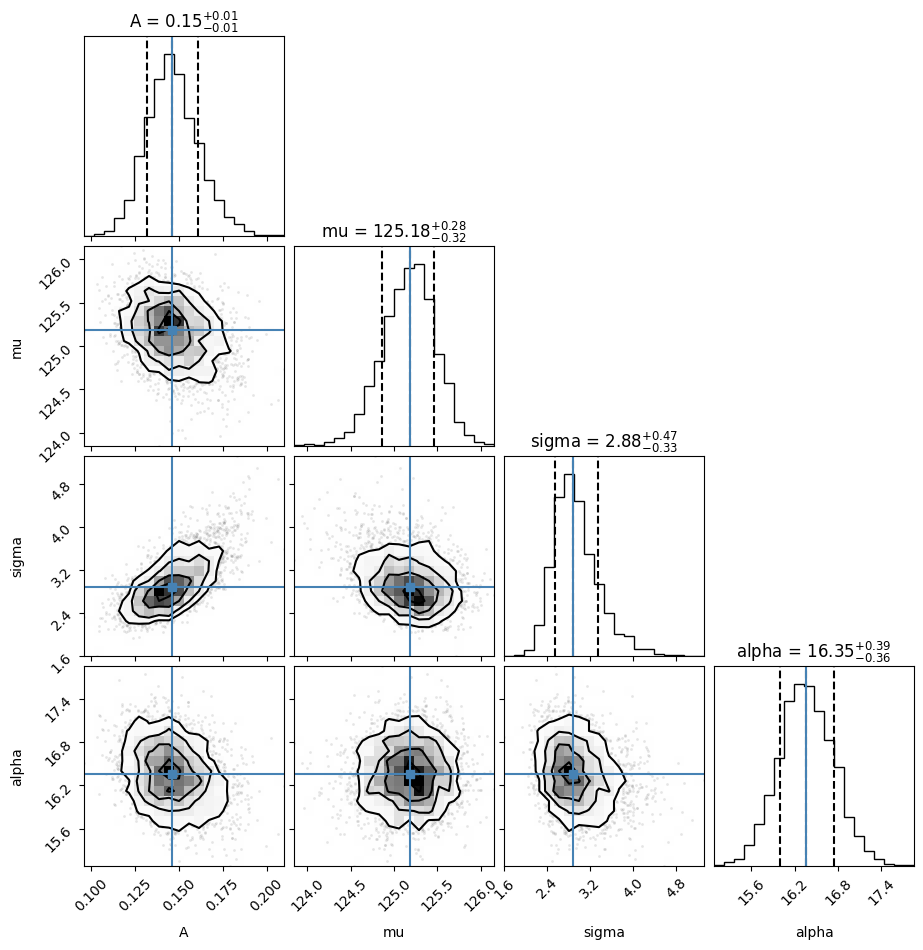

A: 0.1459 (+0.0326, -0.0267)
mu: 125.1842 (+0.5617, -0.6437)
sigma: 2.8758 (+1.1108, -0.6062)
alpha: 16.3518 (+0.7697, -0.7234)


In [154]:
#(o)

sampler = emcee.EnsembleSampler(n_walkers, n_params, LogPosterior, args=(Energia_filtrada,))
pos, prob, state = sampler.run_mcmc(p0, 5000, progress=True)

samples = sampler.get_chain(discard=100, thin=15, flat=True)
labels = ["A", "mu", "sigma", "alpha"]
fig, axes = plt.subplots(n_params, figsize=(10, 7), sharex=True)
for i in range(n_params):
    ax = axes[i]
    ax.plot(samples[:, i], "k", alpha=0.3)
    ax.set_ylabel(labels[i])
plt.xlabel("Step number")
plt.show()

truths = np.percentile(samples, 50, axis=0)
figure = corner.corner(samples, labels=labels, truths=truths, quantiles=[0.16, 0.5, 0.84], show_titles=True)
plt.show()

percentiles = np.percentile(samples, [2.5, 50, 97.5], axis=0)
for i, label in enumerate(labels):
    print(f"{label}: {percentiles[1, i]:.4f} (+{percentiles[2, i] - percentiles[1, i]:.4f}, -{percentiles[1, i] - percentiles[0, i]:.4f})")


In [155]:
#(p)
mu = 125.19
sigma = 2.77

error_porcentual = (sigma / mu) * 100
print(f"El error porcentual en la estimación de la masa es: {error_porcentual:.2f}%")


El error porcentual en la estimación de la masa es: 2.21%


#Hypothesis testing:

Problema 4: Tiempo de escape de un fotón del sol

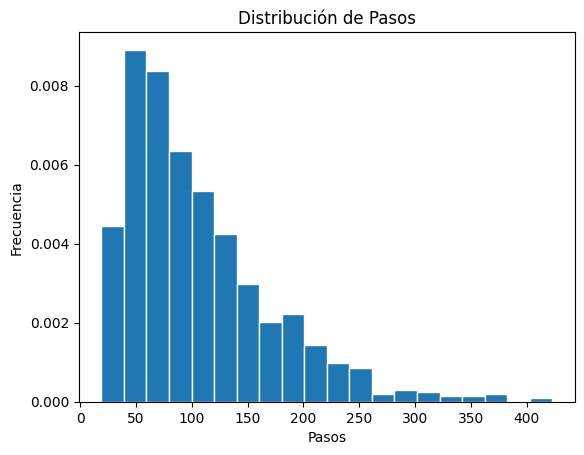

In [ ]:
# Fotones

# a)
N = 1000
Rs = 1.0
l = 0.1

pasos_totales = []

for _ in range(N):
    x, y, z = 0.0, 0.0, 0.0
    pasos = 0

    while np.sqrt(x**2 + y**2 + z**2) <= Rs:
        theta = np.random.uniform(0, 2*np.pi)
        phi = np.random.uniform(0, np.pi)

        x += l * np.sin(phi) * np.cos(theta)
        y += l * np.sin(phi) * np.sin(theta)
        z += l * np.cos(phi)

        pasos += 1

    pasos_totales.append(pasos)

pasos_totales = np.array(pasos_totales)

pasos_totales

plt.hist(pasos_totales, bins=20, density=True, edgecolor='white')
plt.xlabel('Pasos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Pasos')
plt.show()

In [ ]:
# b)
n = 20
min_pasos, max_pasos = pasos_totales.min(), pasos_totales.max()
clases = np.linspace(min_pasos, max_pasos, n + 1)
puntos_medios = (clases[:-1] + clases[1:]) / 2

In [ ]:
# c)
frecuencias, _ = np.histogram(pasos_totales, bins=clases)
frecuencias_normalizadas = frecuencias / N
frecuencias_normalizadas

array([0.09 , 0.18 , 0.169, 0.128, 0.108, 0.086, 0.06 , 0.041, 0.045,
       0.029, 0.02 , 0.017, 0.004, 0.006, 0.005, 0.003, 0.003, 0.004,
       0.   , 0.002])

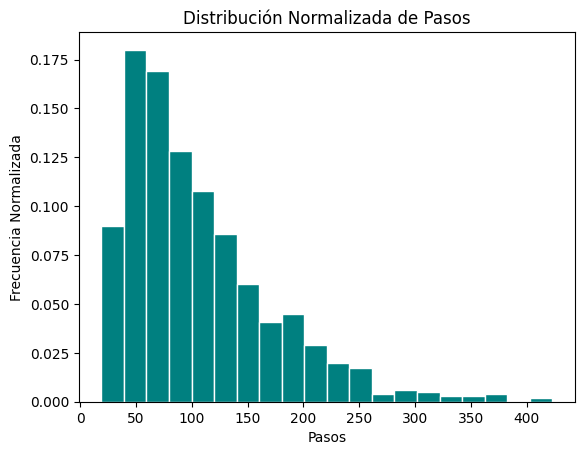

In [ ]:
#(d)
plt.bar(puntos_medios, frecuencias_normalizadas, width=np.diff(clases), edgecolor="white", align="center", color="teal")
plt.xlabel('Pasos')
plt.ylabel('Frecuencia Normalizada')
plt.title('Distribución Normalizada de Pasos')
plt.show()

In [ ]:
#(e)
valor_esperado = np.sum(frecuencias_normalizadas * puntos_medios)
valor_esperado

106.14279999999998

In [ ]:
Ve = np.mean(pasos_totales)
Ve

105.989

In [ ]:
# f)
Valor_pasos = (Rs/l)**2
Valor_pasos

100.0

In [ ]:
# g)
Lr = 0.000006
Rsr = 700000
c = 300000
T = (Rs**2)/Lr*c
T

50000000000.0

In [ ]:
anios = T / (60*60*24*365)
anios

1585.4895991882292

In [ ]:
# h)
from scipy.stats import exponweib
a,c,d,e = exponweib.fit(pasos_totales)
a,c,d,e

(2.0753722453241483, 0.974660812558297, 18.020058784513612, 56.51970319969983)

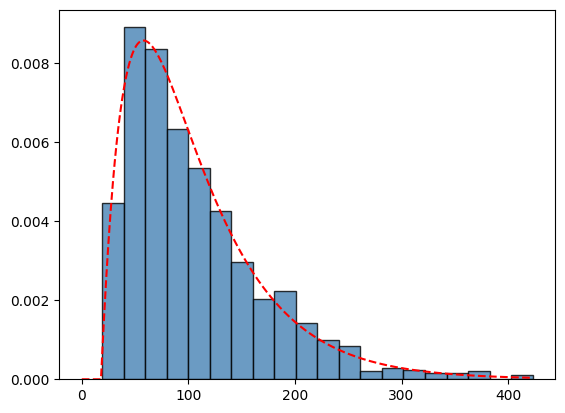

Parámetros ajustados de Weibull: a = 2.08, c = 0.97, loc = 18.02, scale = 56.52


In [ ]:
x = np.linspace(0, max(pasos_totales), 1000)
pdf_fit = exponweib.pdf(x, a, c, d, e)

# Graficar la distribución ajustada
plt.plot(x, pdf_fit, linestyle='--', color='r', label='Distribución Ajustada')
plt.hist(pasos_totales, bins=20, density=True, edgecolor='k', alpha=0.8, color='steelblue')
plt.show()

# Imprimir los parámetros ajustados
print(f"Parámetros ajustados de Weibull: a = {a:.2f}, c = {c:.2f}, loc = {d:.2f}, scale = {e:.2f}")